In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def getCities(num_cities, seed = False):
    cities = []
    for i in range(num_cities):
        if seed:
            rng = np.random.default_rng(i)
        city = [i, rng.integers(0, 500), rng.integers(0, 500)]
        cities.append(city)
    
    return cities

In [3]:
def calcDistance(cities):
    total_sum = 0
    for i in range(len(cities) - 1):
        cityA = cities[i]
        cityB = cities[i + 1]

        d = math.sqrt(
            math.pow(cityB[1] - cityA[1], 2) + math.pow(cityB[2] - cityA[2], 2)
        )

        total_sum += d

    cityA = cities[0]
    cityB = cities[-1]
    d = math.sqrt(math.pow(cityB[1] - cityA[1], 2) + math.pow(cityB[2] - cityA[2], 2))

    total_sum += d

    return total_sum

In [4]:
def createPopulation(cities, size):
    population = []

    for i in range(size):
        c = cities.copy()
        random.shuffle(c)
        distance = calcDistance(c)
        population.append([distance, c])
    fitest = sorted(population)[0]

    return population, fitest

In [5]:
def geneticAlgorithm(
    population,
    lenCities,
    TOURNAMENT_SELECTION_SIZE,
    MUTATION_RATE,
    CROSSOVER_RATE,
    NUM_GENERATION,
    STOP_AFTER
):

    def Crossover():
        parent_1 = sorted(random.choices(population, k=TOURNAMENT_SELECTION_SIZE))[0]
        parent_2 = sorted(random.choices(population, k=TOURNAMENT_SELECTION_SIZE))[0]

        point = random.randint(0, lenCities - 1)

        child_1 = parent_1[1][0:point]
        for j in parent_2[1]:
            if (j in child_1) == False:
                child_1.append(j)

        child_2 = parent_2[1][0:point]
        for j in parent_1[1]:
            if (j in child_2) == False:
                child_2.append(j)
        
        return [calcDistance(child_1),child_1], [calcDistance(child_2),child_2]
    
    def Mutation():
        point1 = random.randint(0, lenCities - 1)
        point2 = random.randint(0, lenCities - 1)
        child_1[1][point1], child_1[1][point2] = child_1[1][point2], child_1[1][point1]                    

        point1 = random.randint(0, lenCities - 1)
        point2 = random.randint(0, lenCities - 1)
        
        child_2[1][point1], child_2[1][point2] = child_2[1][point2], child_2[1][point1]
        
        return child_1, child_2
        

    gen_number = 0
    g = [False for i in range(STOP_AFTER)]
    for i in range(NUM_GENERATION):
        g.pop(0)
        new_population = []
        old_dist = sorted(population)[0][0]

        # ELITISM
        new_population.append(sorted(population)[0])
        new_population.append(sorted(population)[1])

        for i in range((len(population) - 2) // 2):
            # CROSSOVER
            if random.random() < CROSSOVER_RATE:
                child_1,child_2 = Crossover()
                
            else:
                child_1 = random.choices(population)[0]
                child_2 = random.choices(population)[0]
            
            # MUTATION
            if random.random() < MUTATION_RATE:
                child_1, child_2 = Mutation()
            
            new_population.append(child_1)
            new_population.append(child_2)

        population = new_population
        new_dist = sorted(population)[0][0]
        if old_dist == new_dist:
            g.append(True)
        else:
            g.append(False)
        if sum(g)==STOP_AFTER:
            break
        gen_number += 1

#         if gen_number % 10 == 0:
#             print(gen_number, sorted(population)[0][0])

    return sorted(population)[0], gen_number


In [6]:
def drawMap(city, answer):
    for j in city:
        plt.plot(j[1], j[2], "ro")
        plt.annotate(j[0], (j[1], j[2]))

    for i in range(len(answer[1])):
        try:
            first = answer[1][i]
            second = answer[1][i + 1]

            plt.plot([first[1], second[1]], [first[2], second[2]], "gray")
        except:
            continue

    first = answer[1][0]
    second = answer[1][-1]
    plt.plot([first[1], second[1]], [first[2], second[2]], "gray")

    plt.show()

In [7]:
def main(NUM_CITIES, SAME_MAP, POPULATION_SIZE, TOURNAMENT_SELECTION_SIZE, MUTATION_RATE, 
         CROSSOVER_RATE, NUM_GENERATION, STOP_AFTER):
    
    cities = getCities(NUM_CITIES, SAME_MAP)
    firstPopulation, firstFitest = createPopulation(cities, POPULATION_SIZE)
    answer, genNumber = geneticAlgorithm(
        firstPopulation,
        len(cities),
        TOURNAMENT_SELECTION_SIZE,
        MUTATION_RATE,
        CROSSOVER_RATE,
        NUM_GENERATION,
        STOP_AFTER
    )

    print("\n----------------------------------------------------------------")
    print(f"Population: {POPULATION_SIZE}, Mutation rate: {MUTATION_RATE}, crossover rate: {CROSSOVER_RATE}")
    print("Generation: " + str(genNumber))
    print("The shortest distance before training: " + str(firstFitest[0]))
    print("The shortest distance after training: " + str(answer[0]))
    print("----------------------------------------------------------------\n")

#     drawMap(cities, answer)
    return genNumber, answer

In [8]:
NUM_CITIES = 50
SAME_MAP = True
POPULATION_SIZE = [100, 500, 1000, 3000]
MUTATION_RATE = [0.1, 0.2, 0.5]
CROSSOVER_RATE = [0.5, 0.7, 0.9] 
NUM_GENERATION = 1000
STOP_AFTER = 50

data = []
best = float('inf')
for p in POPULATION_SIZE:
    for m in MUTATION_RATE:
        for c in CROSSOVER_RATE:
            gen, answer = main(NUM_CITIES, SAME_MAP, p, int(p * 0.1), m, c, NUM_GENERATION, STOP_AFTER)
            data.append([round(answer[0]), gen, p, c, m])
            if answer[0] < best:
                best = answer[0]
                best_answer = answer


----------------------------------------------------------------
Population: 100, Mutation rate: 0.1, crossover rate: 0.5
Generation: 274
The shortest distance before training: 11597.91056324125
The shortest distance after training: 5982.818825756099
----------------------------------------------------------------


----------------------------------------------------------------
Population: 100, Mutation rate: 0.1, crossover rate: 0.7
Generation: 257
The shortest distance before training: 11046.868570402456
The shortest distance after training: 4382.461722048832
----------------------------------------------------------------


----------------------------------------------------------------
Population: 100, Mutation rate: 0.1, crossover rate: 0.9
Generation: 354
The shortest distance before training: 11715.373470213506
The shortest distance after training: 4713.4608948494
----------------------------------------------------------------


---------------------------------------------


----------------------------------------------------------------
Population: 1000, Mutation rate: 0.5, crossover rate: 0.9
Generation: 209
The shortest distance before training: 10220.274469919112
The shortest distance after training: 3216.12170071963
----------------------------------------------------------------


----------------------------------------------------------------
Population: 3000, Mutation rate: 0.1, crossover rate: 0.5
Generation: 247
The shortest distance before training: 10539.103388776866
The shortest distance after training: 3654.0495835570805
----------------------------------------------------------------


----------------------------------------------------------------
Population: 3000, Mutation rate: 0.1, crossover rate: 0.7
Generation: 159
The shortest distance before training: 10838.83802056402
The shortest distance after training: 3488.6410534796014
----------------------------------------------------------------


---------------------------------------

In [18]:
df = pd.DataFrame(data, columns=['distance', 'generation', 'population_size', 'crossover_rate[%]', 'mutation_rate[%]'])

In [19]:
df = df.sort_values(by=['distance', 'generation'])
df[['crossover_rate[%]', 'mutation_rate[%]']] *= 100
df

,distance,generation,population_size,crossover_rate[%],mutation_rate[%]
26,3216,209,1000,90.0,50.0
25,3218,316,1000,70.0,50.0
31,3389,216,3000,70.0,20.0
35,3417,243,3000,90.0,50.0
28,3489,159,3000,70.0,10.0
22,3508,287,1000,70.0,20.0
17,3531,240,500,90.0,50.0
29,3568,197,3000,90.0,10.0
20,3571,225,1000,90.0,10.0
24,3594,256,1000,50.0,50.0


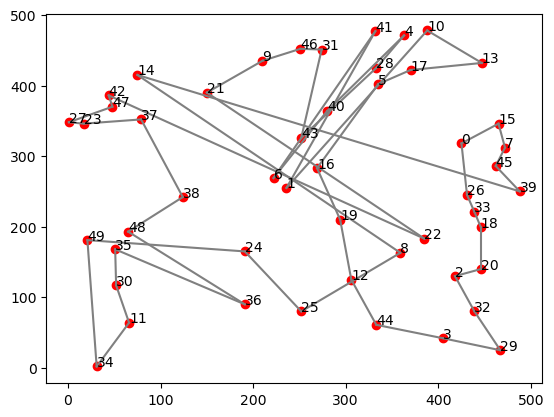

In [20]:
cities = getCities(NUM_CITIES, SAME_MAP)
drawMap(cities, best_answer)

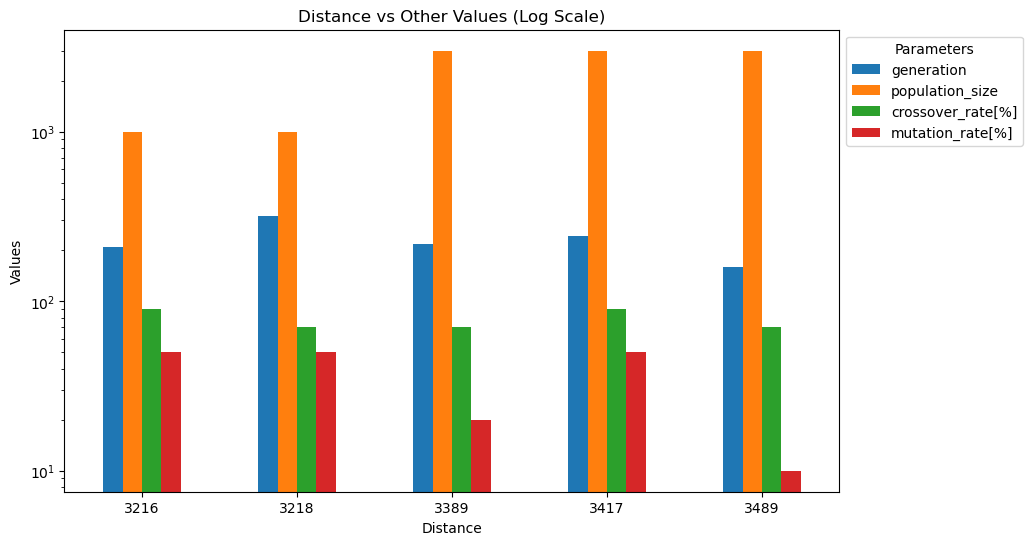

In [21]:
df = df.head()
df.set_index('distance', inplace=True)

# Plot
df.plot(kind='bar', figsize=(10, 6))
plt.title('Distance vs Other Values (Log Scale)')
plt.xlabel('Distance')
plt.ylabel('Values')
plt.legend(title='Parameters', bbox_to_anchor=(1, 1))
plt.yscale('log')
plt.xticks(rotation=0)
plt.show()